In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df=pd.read_csv("laptop.csv")

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df['Ram'] = df['Ram'].str.replace('GB', '', regex=False)
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce')

<Axes: ylabel='Ram'>

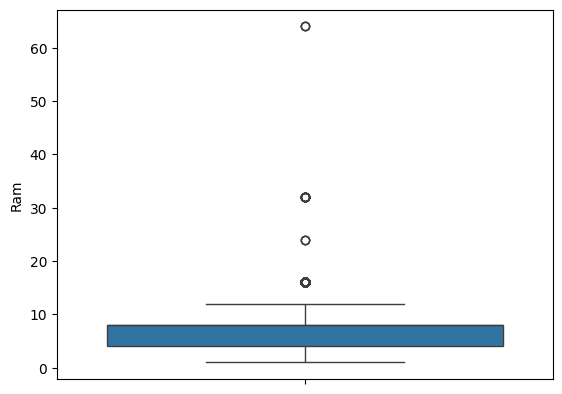

In [10]:
sns.boxplot(df["Ram"])

In [12]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [14]:
df = df.dropna()

In [16]:
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False)
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce') 

In [17]:
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '', regex=False)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

In [18]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [19]:
df = df[df['Price'].notnull()]


In [20]:
df = df.dropna()

In [21]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

C:\Users\Phanindra\AppData\Local\Temp\ipykernel_2424\2139924168.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [23]:
X = df.drop(columns='Price')
y = df['Price']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.linear_model import LinearRegression

l= LinearRegression()
l.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = l.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

R2 Score: 0.8232840620580237
RMSE: 14311.124715177211


In [28]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor()
r.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
y_pred = r.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

R2 Score: 0.8120200057402969
RMSE: 14760.18233259987


In [31]:
import joblib


In [35]:
joblib.dump(l, 'laptop_price_model.pkl')

['laptop_price_model.pkl']

In [37]:
joblib.dump(X_train.columns, 'model_columns.pkl')


['model_columns.pkl']

In [38]:
model = joblib.load('laptop_price_model.pkl')
model_columns = joblib.load('model_columns.pkl')

In [ ]:
input_df = pd.DataFrame([{
    "Company": company,
    "TypeName": typename,
    "Ram": ram,
    "Weight": weight,
    "Touchscreen": 1 if touchscreen == "Yes" else 0,
    "Ips": 1 if ips == "Yes" else 0,
    "Ppi": ppi,
    "Cpu Brand": cpu_brand,
    "HDD": hdd,
    "SSD": ssd,
    "Gpu Brand": gpu_brand,
    "OpSys": os
}])


input_encoded = pd.get_dummies(input_df)


input_encoded = input_encoded.reindex(columns=model_columns, fill_value=0)


price = model.predict(input_encoded)[0]
